# Visual method to estimate the correct value of ultrametric sequence hyperparameters

Notebook to explore hyper-parameters and select a temperature and a block size for random blocks which have roughly equivalent dataset exploration

In [110]:
import numpy as np

def lbl_history(seq, T_list, scope_max=None, shuffled_blocksz=None, strides=None):
    n_Ts = len(T_list)
    assert (n_Ts>0)
    t_explr = None

    lbls_fig = plt.figure(figsize=(18,10*n_Ts))
    lbls_axes = []

    for T_id, T in enumerate(T_list):
        if shuffled_blocksz is None:
            occur_id = random.randint(0, len(seq)-1)
        else:
            occur_id = random.randint(0, len(self.train_labels_shfl[T][shuffled_blocksz])-1)
            seq = self.train_labels_shfl[T][shuffled_blocksz][occur_id]

        n_labels = len(set(seq))
        lbls_ax = plt.subplot(n_Ts, 1, 1+T_id)
        lbls_axes.append(lbls_ax)
        lbls_ax.plot(seq)

        obs_lbl_set = set()
        nobs_seq = []
        for itr_id, lbl in enumerate(seq):
            obs_lbl_set.add(lbl)
            nobs_seq.append(len(obs_lbl_set))
            if t_explr is None and len(obs_lbl_set) == n_labels:
                t_explr = itr_id

        lbls_ax.plot(nobs_seq)
        if strides is not None:
            for stride in strides:
                lbls_ax.axvline(x=stride, ymin=0, ymax=n_labels)

        ttl = 'History of labels in the original training sequence - T='+str(T)
        if t_explr:
            ttl = ttl+' - tau_asym=' + str(t_explr)
            
    if scope_max is not None:
        lbls_ax.set_xlim([0,scope_max])
            
    plt.title(ttl)
    plt.show()
    return lbls_fig, lbls_axes

def get_average_expltime(seqs):
    t_explrs = []
    for seq in seqs:
        t_explr = None
        n_labels = len(set(seq))
        obs_lbl_set = set()
        nobs_seq = []
        for itr_id, lbl in enumerate(seq):
            obs_lbl_set.add(lbl)
            nobs_seq.append(len(obs_lbl_set))
            if t_explr is None and len(obs_lbl_set) == n_labels:
                t_explr = itr_id
        if t_explr is not None:
            t_explrs.append(t_explr)
            
    avg_t_explr = np.mean(t_explrs)
    std_t_explr = np.std(t_explrs)
    return len(t_explrs), avg_t_explr, std_t_explr

## Sequence parameters

In [123]:
T = 2.25e-1
split_length = [1000]
tree_depth = 3 #3 for MNIST
tree_branching = 2 #other values not supported yet
seq_length = 600000
test_nbr = 10 
hidden_size = 256 # size of the neural net hidden layer

## Sequence generation 

Generate the sequence necessary for HP exploration: an ultrametric sequence and a random blocks sequence

In [124]:
import os
import matplotlib.pyplot as plt
import random
nwd = '/home/slebastard-adc/Documents/Projects/ultrametric_benchmark/Ultrametric-Benchmark'
os.chdir(nwd)
from trainer import Trainer
from dataset import Dataset

In [125]:
mnist_ds = Dataset(data_origin='MNIST')
trainer_um = Trainer(dataset=mnist_ds, network='network', training_type='ultrametric',
                    memory_sampling='reservoir sampling', memory_sz=10, sequence_length=seq_length,
                    energy_step=1, T=T, split_length_list=split_length, batch_sz=10)
trainer_rb = Trainer(dataset=mnist_ds, network='network', training_type='random_blocks2',
                    memory_sampling='reservoir sampling', memory_sz=10, sequence_length=seq_length,
                    energy_step=1, T=T, split_length_list=split_length, batch_sz=10)

Generate the digits sequences for both cases

In [126]:
um_seqs = []
rb_seqs = []
n_trials = 30

for trial_id in range(n_trials):
    trainer_um.make_train_sequence()
    um_seqs.append(trainer_um.train_sequence)
    trainer_rb.make_train_sequence()
    rb_seqs.append(trainer_rb.train_sequence)
    
um_n_expl_success, um_mean_t_expl, um_std_t_expl = get_average_expltime(um_seqs)
rb_n_expl_success, rb_mean_t_expl, rb_std_t_expl = get_average_expltime(rb_seqs)

Transition rates vector : [0.00000000e+00 9.89385837e-01 5.25133672e-03 5.25133672e-03
 2.78723793e-05 2.78723793e-05 2.78723793e-05 2.78723793e-05]
Transition rates vector : [0.00000000e+00 9.89385837e-01 5.25133672e-03 5.25133672e-03
 2.78723793e-05 2.78723793e-05 2.78723793e-05 2.78723793e-05]
Transition rates vector : [0.00000000e+00 9.89385837e-01 5.25133672e-03 5.25133672e-03
 2.78723793e-05 2.78723793e-05 2.78723793e-05 2.78723793e-05]
Transition rates vector : [0.00000000e+00 9.89385837e-01 5.25133672e-03 5.25133672e-03
 2.78723793e-05 2.78723793e-05 2.78723793e-05 2.78723793e-05]
Transition rates vector : [0.00000000e+00 9.89385837e-01 5.25133672e-03 5.25133672e-03
 2.78723793e-05 2.78723793e-05 2.78723793e-05 2.78723793e-05]
Transition rates vector : [0.00000000e+00 9.89385837e-01 5.25133672e-03 5.25133672e-03
 2.78723793e-05 2.78723793e-05 2.78723793e-05 2.78723793e-05]
Transition rates vector : [0.00000000e+00 9.89385837e-01 5.25133672e-03 5.25133672e-03
 2.78723793e-05 2.7

In [127]:
um_n_expl_success, um_mean_t_expl, um_std_t_expl = get_average_expltime(um_seqs)
rb_n_expl_success, rb_mean_t_expl, rb_std_t_expl = get_average_expltime(rb_seqs)

In [128]:
print("Ultrametric: {0:d}/{1:d} sequences have reached full exploration, with average exploration time {2:.1f} epochs (std dev {3:.1f})".format(
    um_n_expl_success,
    n_trials,
    um_mean_t_expl,
    um_std_t_expl
))

print("Random blocks: {0:d}/{1:d} sequences have reached full exploration, with average exploration time {2:.1f} epochs (std dev {3:.1f})".format(
    rb_n_expl_success,
    n_trials,
    rb_mean_t_expl,
    rb_std_t_expl
))

Ultrametric: 30/30 sequences have reached full exploration, with average exploration time 8769.2 epochs (std dev 7578.8)
Random blocks: 30/30 sequences have reached full exploration, with average exploration time 7635.1 epochs (std dev 3928.5)


## Plot labels history

Plot the Ultrametric sequence and the history of visited labels

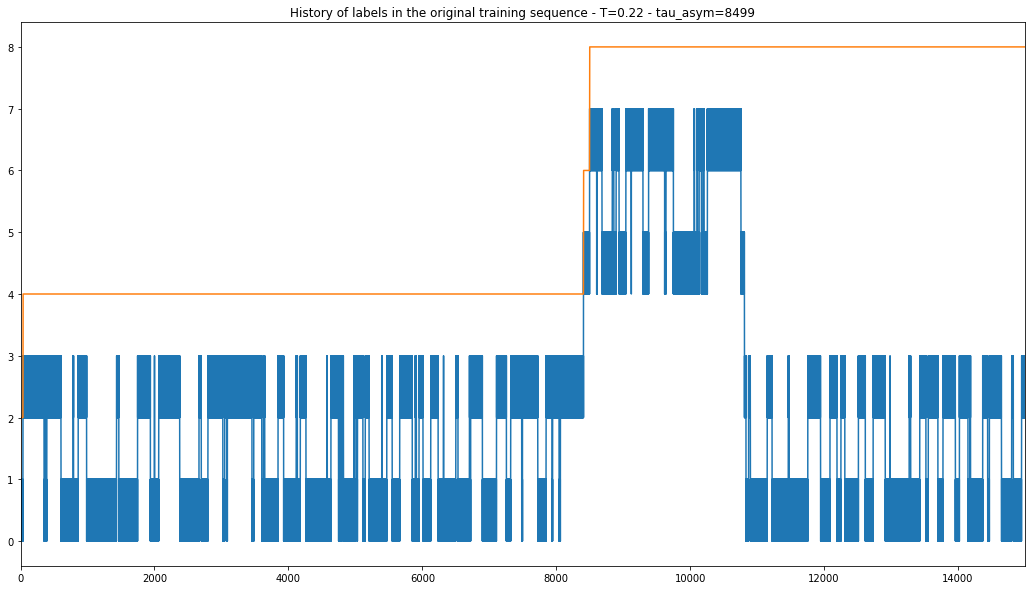

(<Figure size 1296x720 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f7de7d7c550>])

In [133]:
lbl_history(um_seqs[0], [T], scope_max=1.5e4) 

Plot the Random Blocks sequence and the history of visited labels

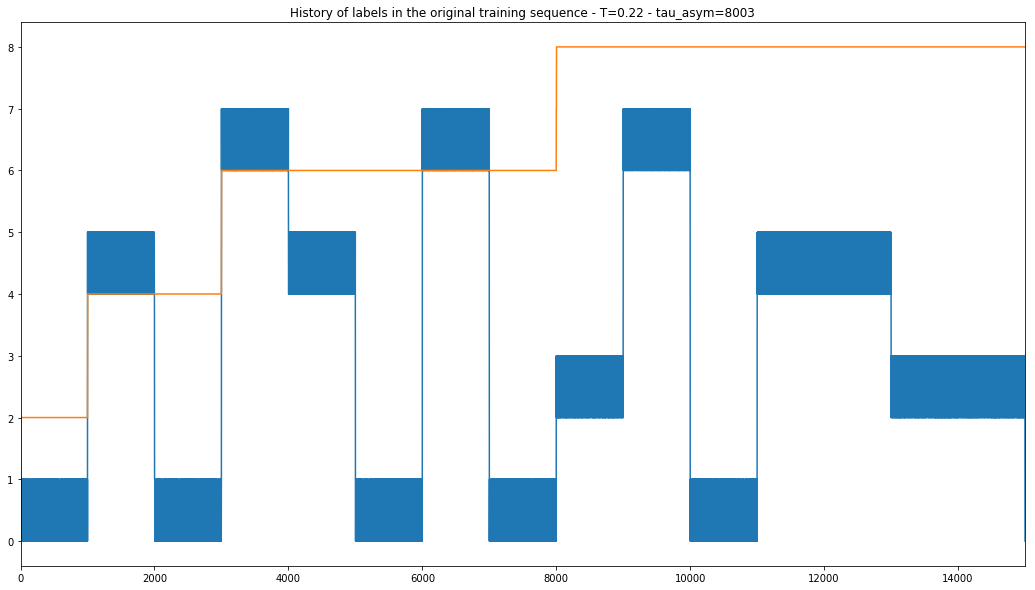

(<Figure size 1296x720 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f7ddd706a58>])

In [132]:
lbl_history(trainer_rb.train_sequence, [T], scope_max=1.5e4) 

## Testing network accuracy

To make sure the temperature is correct, need to check that the network trained on the UM sequence reaches asymptotique accurary sensibly before the end of the training

In [134]:
import neuralnet
from ultrametric_analysis import ultrametric_analysis

In [135]:
net = neuralnet.Net_FCL(dataset=mnist_ds, hidden_size=hidden_size)
trainer_um.network = net
trainer_um.network_orig = net
trainer_um.network_shfl = net

In [136]:
class Argument: 
    def __init__(self, verbose, test_nbr, test_stride, lr, sequence_type, enable_shuffling): 
        self.verbose = verbose
        self.test_nbr = test_nbr
        self.test_stride = test_stride
        self.lr = lr 
        self.sequence_type = sequence_type
        self.enable_shuffling = enable_shuffling
      
test_stride = int(seq_length/test_nbr)
args = Argument(verbose=1, test_nbr=test_nbr, test_stride=test_stride, lr=0.01, 
                sequence_type="ultrametric", enable_shuffling=False)

In [137]:
rs = ultrametric_analysis(trainer_um, args, [])

Data generation...
Transition rates vector : [0.00000000e+00 9.89385837e-01 5.25133672e-03 5.25133672e-03
 2.78723793e-05 2.78723793e-05 2.78723793e-05 2.78723793e-05]
...done

[1000] loss: 0.1929
[2000] loss: 0.0688
[3000] loss: 0.1026
[4000] loss: 0.0792
[5000] loss: 0.0679
[6000] loss: 0.0801
--- Finished Experience Replay training on (0, 60000) ---
Accuracy of the network on the 7136 test images: 80.79%
[7000] loss: 0.0757
[8000] loss: 0.0551
[9000] loss: 0.0904
[10000] loss: 0.0728
[11000] loss: 0.0605
[12000] loss: 0.0586
--- Finished Experience Replay training on (60000, 120000) ---
Accuracy of the network on the 7136 test images: 83.77%
[13000] loss: 0.0493
[14000] loss: 0.0549
[15000] loss: 0.0716
[16000] loss: 0.0501
[17000] loss: 0.0439
[18000] loss: 0.0423
--- Finished Experience Replay training on (120000, 180000) ---
Accuracy of the network on the 7136 test images: 60.71%
[19000] loss: 0.0859
[20000] loss: 0.0489
[21000] loss: 0.0607
[22000] loss: 0.0537
[23000] loss: 0.0